Ingrese el número de piezas: 6


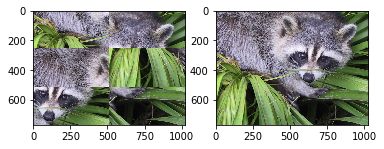

Seleccione una pieza [1 - 6]: 5
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 1


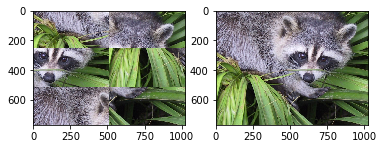

Seleccione una pieza [1 - 6]: 3
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 4


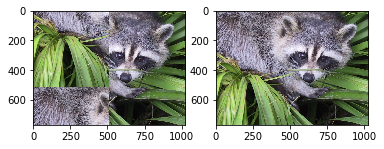

Seleccione una pieza [1 - 6]: 5
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 1


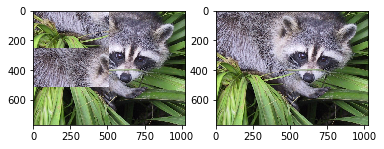

Seleccione una pieza [1 - 6]: 3
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 1


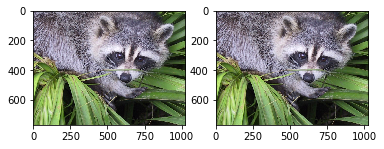

Rompecabezas terminado


In [1]:
import numpy as np
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt

goal = misc.face()
divisionY = 0
divisionX = 0

def getMinPrime(numero, factor):
    if(numero / factor == 1):
        return factor
    elif(numero % factor == 0):
        return getMinPrime(numero / factor, 2)
    else:
        return getMinPrime(numero, factor + 1)

def estaCompleto(puzzle):
    return np.array_equal(goal, puzzle)

def cortarPuzzle(toCut):
    vertical_slices = np.split(toCut, divisionY)
    handler = 0
    pieces_slices = np.zeros([int(piezas), int(goal.shape[0] / divisionY), int(goal.shape[1] / divisionX), 3], dtype=int)
    for slice in vertical_slices:
        horizontal_slices = np.hsplit(slice, divisionX)
        for h_slice in horizontal_slices:
            pieces_slices[handler] = h_slice
            handler += 1
    return pieces_slices

def generarPuzzle(piezas):
    global divisionX
    global divisionY
    divisionY = getMinPrime(int(piezas), 2)
    divisionX = int(int(piezas) / divisionY)
    pieces_slices = cortarPuzzle(goal)
    np.random.shuffle(pieces_slices)
    return reconstruirPuzzle(pieces_slices)

def reconstruirPuzzle(pieces_slices):
    puzzle = np.zeros([divisionY, int(goal.shape[0] / divisionY), goal.shape[1], 3], dtype=int)
    for i in range(1, divisionY + 1):
        puzzle[i - 1] = np.concatenate(pieces_slices[(i -1) * divisionX: i * divisionX], 1)
    puzzle_final = np.concatenate(puzzle, 0)
    return puzzle_final

def mostrarPuzzle():
    plt.figure(1)
    plt.subplot(121)
    plt.imshow(puzzle)
    plt.subplot(122)
    plt.imshow(goal)
    plt.show()

def menu_movimiento():
    print("Seleccione a donde desea desplazar esta pieza:")
    print("1. Arriba")
    print("2. Abajo")
    print("3. Izquierda")
    print("4. Derecha")
    return int(input("Seleccione una opción: "))

def movimiento(pieza, orden):
    actual_puzzle = cortarPuzzle(puzzle)
    if(orden == 1):
        mover = (pieza - divisionX) % int(piezas)
    elif(orden == 2):
        mover = (pieza + divisionX) % int(piezas)
    elif(orden == 3):
        mover = (pieza - 1) % int(piezas)
    else:
        mover = (pieza + 1) % int(piezas)
    actual_puzzle[[mover, pieza]] = actual_puzzle[[pieza,mover]] 
    return reconstruirPuzzle(actual_puzzle)

def main():
    piezas = input("Ingrese el número de piezas: ")
    puzzle = generarPuzzle(piezas)

    while(not estaCompletoto(puzzle)):
        mostrarPuzzle()
        pieza_seleccionada = input(f"Seleccione una pieza [1 - {piezas}]: ")
        movimiento_seleccionado = menu_movimiento()
        puzzle = movimiento(int(pieza_seleccionada) - 1, movimiento_seleccionado)
    mostrarPuzzle()
    print("Rompecabezas terminado")

In [ ]:
main()